In [1]:
# inline charts & graphs
%matplotlib inline

# dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sts
import matplotlib as mpl

# load csv files
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [2]:
# create city df
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [3]:
# create ride df
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14,13.83,5.740000e+12
1,South Michelleport,2019-03-04 18:24,30.24,2.340000e+12
2,Port Samanthamouth,2019-02-24 4:29,33.44,2.010000e+12
3,Rodneyfort,2019-02-10 23:22,23.44,5.150000e+12
4,South Jack,2019-03-06 4:28,34.58,3.910000e+12


In [4]:
# city data: check for null values (count())
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [5]:
# city data: check for null values (isnull().sum())
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [6]:
# city data: check data types
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [7]:
# Get the unique values of the type of city.
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [8]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"]=="Urban")

66

In [9]:
# Get the number of data points from the Suburban cities.
sum(city_data_df["type"]=="Suburban")

36

In [10]:
# Get the number of data points from the Rural cities.
sum(city_data_df["type"]=="Rural")

18

In [11]:
# Get the columns and the rows that are not null.
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [12]:
# Get the columns and the rows that are not null.
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [13]:
# Ride data: check data types
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id    float64
dtype: object

In [14]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14,13.83,5.740000e+12,5,Urban
1,South Michelleport,2019-03-04 18:24,30.24,2.340000e+12,72,Urban
2,Port Samanthamouth,2019-02-24 4:29,33.44,2.010000e+12,57,Urban
3,Rodneyfort,2019-02-10 23:22,23.44,5.150000e+12,34,Urban
4,South Jack,2019-03-06 4:28,34.58,3.910000e+12,46,Urban


In [15]:
# Create the Urban city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14,13.83,5.740000e+12,5,Urban
1,South Michelleport,2019-03-04 18:24,30.24,2.340000e+12,72,Urban
2,Port Samanthamouth,2019-02-24 4:29,33.44,2.010000e+12,57,Urban
3,Rodneyfort,2019-02-10 23:22,23.44,5.150000e+12,34,Urban
4,South Jack,2019-03-06 4:28,34.58,3.910000e+12,46,Urban


In [16]:
# Create the Suburban city DataFrame.
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 3:08,27.79,6.650000e+12,11,Suburban
1626,East Kentstad,2019-04-07 19:44,18.75,6.580000e+12,20,Suburban
1627,Lake Omar,2019-01-17 21:33,21.71,9.670000e+11,22,Suburban
1628,Myersshire,2019-02-27 17:38,17.10,5.710000e+12,19,Suburban
1629,West Hannah,2019-04-19 1:06,37.78,2.270000e+12,12,Suburban


In [17]:
# Create the Rural city DataFrame.
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13,43.22,1.080000e+12,9,Rural
2251,North Holly,2019-02-02 14:54,12.42,1.990000e+12,8,Rural
2252,Michaelberg,2019-03-27 18:27,54.85,4.420000e+12,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12,47.90,3.270000e+12,2,Rural
2254,Lake Latoyabury,2019-05-06 8:57,51.80,4.020000e+12,2,Rural


In [18]:
# Get the number of rides for urban cities.
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [19]:
# Get the number of rides for suburban & rural cities.
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

In [20]:
# Get average fare for each city in the urban cities.
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [21]:
# Get average fare for each city in the suburban & rural cities.
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

In [22]:
# Get the average number of drivers for each urban city.
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh        12
Barajasview        26
Carriemouth        52
Christopherfurt    41
Deanville          49
Name: driver_count, dtype: int64

In [23]:
# Get the average number of drivers for each suburban & rural city.
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

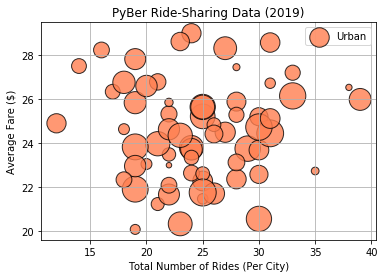

In [24]:
# Build the scatter plots for urban cities.
plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            s=urban_driver_count*10, 
            c="coral", 
            edgecolor="black", 
            linewidths=1, 
            alpha=0.8, 
            label="Urban")

# Formatting
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

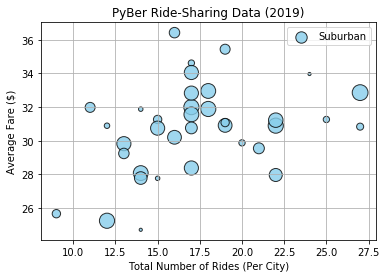

In [25]:
# Build the scatter plots for suburban cities.
plt.scatter(suburban_ride_count, 
            suburban_avg_fare, 
            s=suburban_driver_count*10, 
            c="skyblue", 
            edgecolor="black", 
            linewidths=1, 
            alpha=0.8, 
            label="Suburban")

# Formatting
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

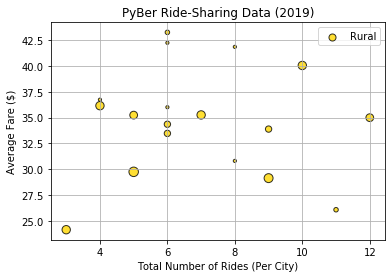

In [26]:
# Build the scatter plots for rural cities.
plt.scatter(rural_ride_count, 
            rural_avg_fare, 
            s=rural_driver_count*10, 
            c="gold", 
            edgecolor="black", 
            linewidths=1, 
            alpha=0.8, 
            label="Rural")

# Formatting
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

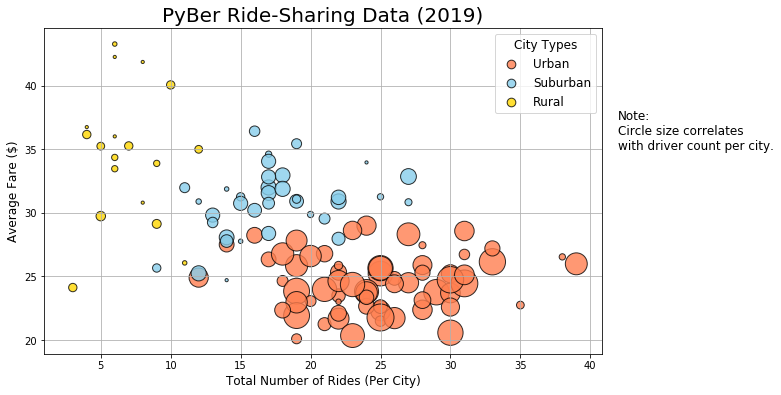

In [27]:
# Combine scatter plots for each type of city
# Enlarge figure
plt.subplots(figsize=(10,6))

# Urban
plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            s=urban_driver_count*10, 
            c="coral", 
            edgecolor="black", 
            linewidths=1, 
            alpha=0.8, 
            label="Urban")

# Suburban
plt.scatter(suburban_ride_count, 
            suburban_avg_fare, 
            s=suburban_driver_count*10, 
            c="skyblue", 
            edgecolor="black", 
            linewidths=1, 
            alpha=0.8, 
            label="Suburban")

# Rural
plt.scatter(rural_ride_count, 
            rural_avg_fare, 
            s=rural_driver_count*10, 
            c="gold", 
            edgecolor="black", 
            linewidths=1, 
            alpha=0.8, 
            label="Rural")

# Graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Text label about circle size
plt.text(42, 35, "Note:\nCircle size correlates\nwith driver count per city.", fontsize="12")

# Save the figure
plt.savefig("Analysis/Fig1.png", bbox_inches="tight")

# Show plot
plt.show()

In [28]:
# urban cities: summary stats
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907463e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400000e+12,22.000000
50%,24.640000,4.710000e+12,37.000000
75%,34.580000,7.450000e+12,52.000000
max,44.970000,9.990000e+12,73.000000


In [29]:
# suburban cities: summary stats
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.000000,6.250000e+02,625.000000
mean,30.970128,4.970885e+12,13.712000
std,10.677508,2.912444e+12,8.042372
min,12.050000,3.218337e+08,1.000000
25%,21.970000,2.360000e+12,5.000000
50%,30.750000,5.050000e+12,16.000000
75%,39.830000,7.550000e+12,21.000000
max,49.960000,9.920000e+12,25.000000


In [30]:
# rural cities: summary stats
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.000000,1.250000e+02,125.000000
mean,34.623440,4.648063e+12,4.296000
std,14.558046,2.887934e+12,2.691156
min,10.110000,2.684873e+10,1.000000
25%,19.900000,2.280000e+12,1.000000
50%,37.050000,4.020000e+12,4.000000
75%,47.070000,7.120000e+12,7.000000
max,58.550000,9.990000e+12,9.000000


In [31]:
# urban_ride_count: summary stats
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [32]:
# suburban_ride_count: summary stats
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [33]:
# rural_ride_count: summary stats
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [34]:
# Pandas: mean of the ride count for each city type
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [35]:
# Pandas: median of the ride count for each city type
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [36]:
# Pandas: mode of the ride count for the urban cities
urban_ride_count.mode()

0    22
1    25
dtype: int64

In [37]:
# Pandas: mode of the ride count for the suburban cities
suburban_ride_count.mode()

0    17
dtype: int64

In [38]:
# Pandas: mode of the ride count for the rural cities
rural_ride_count.mode()

0    6
dtype: int64

In [39]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22]), count=array([7])).


In [40]:
# Calculate the measures of central tendency for the ride count for the suburban cities.
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")

The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.0.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17]), count=array([7])).


In [41]:
# Calculate the measures of central tendency for the ride count for the rural cities.
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 6.0.
The mode for the ride counts for rural trips is ModeResult(mode=array([6]), count=array([5])).


In [42]:
# Get the fares for the urban cities.
urban_fares = urban_cities_df["fare"]
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [43]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [44]:
# get the fares for suburban cities
suburban_fares = suburban_cities_df["fare"]
suburban_fares.head()

1625    27.79
1626    18.75
1627    21.71
1628    17.10
1629    37.78
Name: fare, dtype: float64

In [45]:
# Calculate the measures of central tendency for the average fare for the suburban cities.
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")

The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [46]:
# get the fares for rural cities
rural_fares = rural_cities_df["fare"]
rural_fares.head()

2250    43.22
2251    12.42
2252    54.85
2253    47.90
2254    51.80
Name: fare, dtype: float64

In [47]:
# calculate the measures of central tendency for the average fare for rural cities.
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")

The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is ModeResult(mode=array([37.05]), count=array([2])).


In [48]:
# get the driver count data from the urban cities.
urban_drivers = urban_cities_df['driver_count']
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [49]:
# calculate the measures of central tendency for the # of drivers for urban cities.
mean_urban_drivers = np.mean(urban_drivers)
print(f"The mean number of drivers for each urban city is {mean_urban_drivers:.0f}.")

median_urban_drivers = np.median(urban_drivers)
print(f"The median number of drivers for each urban city is {median_urban_drivers:.0f}.")

mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode number of drivers for each urban city is {mode_urban_drivers}.")

The mean number of drivers for each urban city is 37.
The median number of drivers for each urban city is 37.
The mode number of drivers for each urban city is ModeResult(mode=array([39]), count=array([86])).


In [50]:
# get the driver count data from the suburban cities
suburban_drivers = suburban_cities_df['driver_count']
suburban_drivers.head()

1625    11
1626    20
1627    22
1628    19
1629    12
Name: driver_count, dtype: int64

In [51]:
# calculate the measures of central tendency for the # of drivers for suburban cities
mean_suburban_drivers = np.mean(suburban_drivers)
print(f"The mean number of drivers for each suburban city is {mean_suburban_drivers:.0f}.")

median_suburban_drivers = np.median(suburban_drivers)
print(f"The median number of drivers for each suburban city is {median_suburban_drivers:.0f}.")

mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The mode number of drivers for each suburban city is {mode_suburban_drivers}.")

The mean number of drivers for each suburban city is 14.
The median number of drivers for each suburban city is 16.
The mode number of drivers for each suburban city is ModeResult(mode=array([20]), count=array([79])).


In [52]:
# get the driver count data from the rural cities
rural_drivers = rural_cities_df['driver_count']
rural_drivers.head()

2250    9
2251    8
2252    6
2253    2
2254    2
Name: driver_count, dtype: int64

In [53]:
# calculate the measures of central tendency for the # of drivers for rural cities
mean_rural_drivers = np.mean(rural_drivers)
print(f"The mean number of drivers for each rural city is {mean_rural_drivers:.0f}.")

median_rural_drivers = np.median(rural_drivers)
print(f"The median number of drivers for each rural city is {median_rural_drivers:.0f}.")

mode_rural_drivers = sts.mode(rural_drivers)
print(f"The mode number of drivers for each rural city is {mode_rural_drivers}.")

The mean number of drivers for each rural city is 4.
The median number of drivers for each rural city is 4.
The mode number of drivers for each rural city is ModeResult(mode=array([1]), count=array([32])).


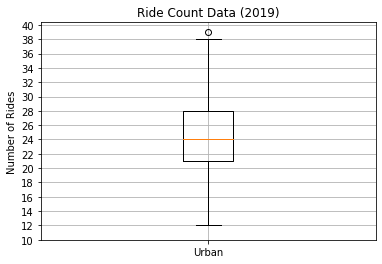

In [54]:
# create a box-and-whisker plot for the urban cities ride count
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

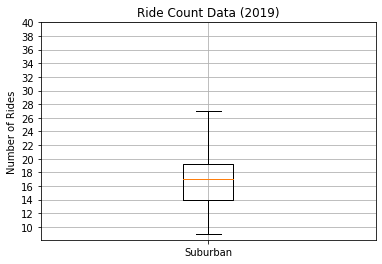

In [55]:
# create a box-and-whisker plot for the suburban cities ride count
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

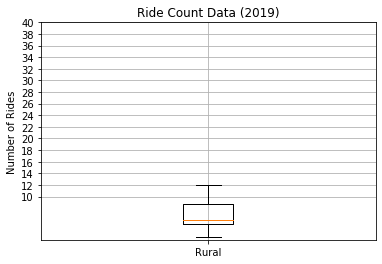

In [56]:
# create a box-and-whisker plot for the rural cities ride count
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()
plt.show()

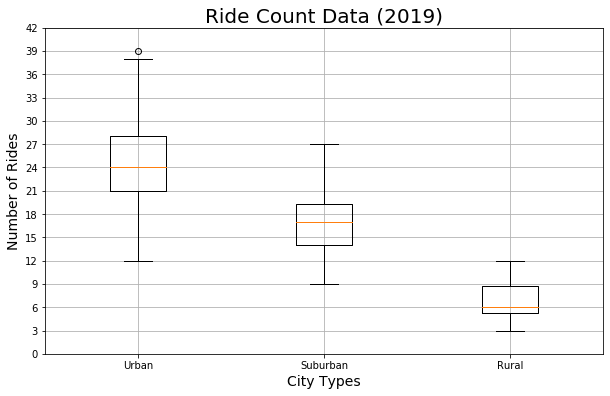

In [57]:
# add all ride count box-and-whisker plots to the same graph
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Types",fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()
# save the figure
plt.savefig("Analysis/Fig2.png")
plt.show()

In [58]:
# get the city that matches 39
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


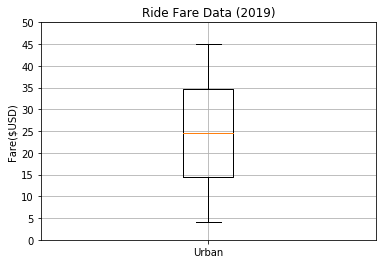

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [59]:
# create a box-and-whisker plot for the urban fare data
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)
# add the title, y-axis label and grid
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

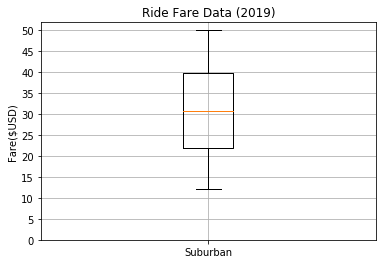

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [60]:
# create a box-and-whisker plot for the suburban fare data
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_fares, labels=x_labels)
# add the title, y-axis label and grid
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_fares.describe()

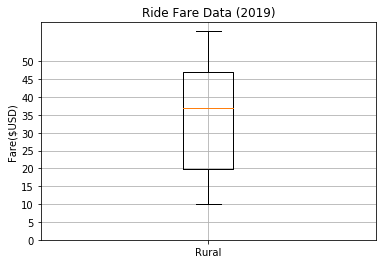

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [61]:
# create a box-and-whisker plot for the rural fare data
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels=x_labels)
# add the title, y-axis label and grid
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_fares.describe()

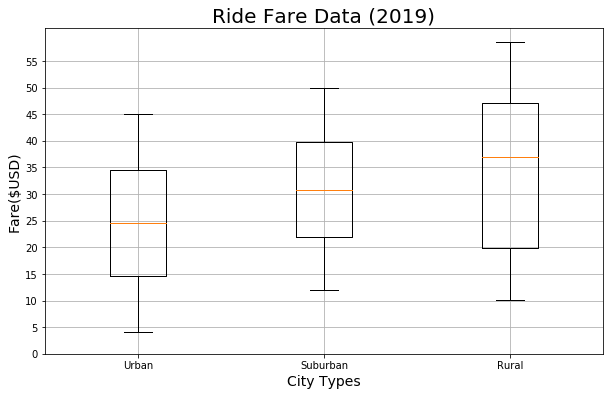

In [62]:
# create a box-and-whisker plot for the rural fare data
x_labels = ["Urban", "Suburban", "Rural"]
fares_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(fares_data, labels=x_labels)
# add the title, y-axis label and grid
ax.set_title('Ride Fare Data (2019)', fontsize=20)
ax.set_ylabel('Fare($USD)', fontsize=14)
ax.set_xlabel('City Types', fontsize=14)
ax.set_yticks(np.arange(0, 60, step=5.0))
ax.grid()
# save the figure
plt.savefig("Analysis/Fig3.png")
plt.show()

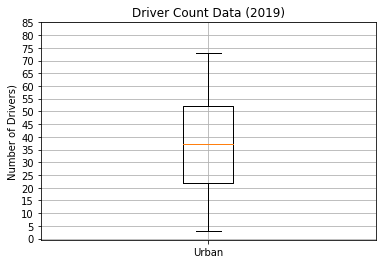

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [63]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

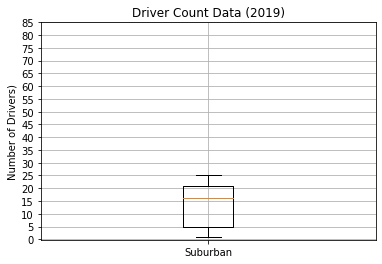

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [64]:
# Create the box-and-whisker plot for the suburban driver count data.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_drivers.describe()

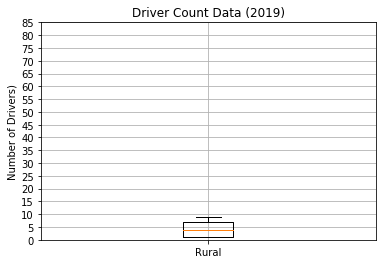

Summary Statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [65]:
# Create the box-and-whisker plot for the rural driver count data.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_drivers,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_drivers.describe()

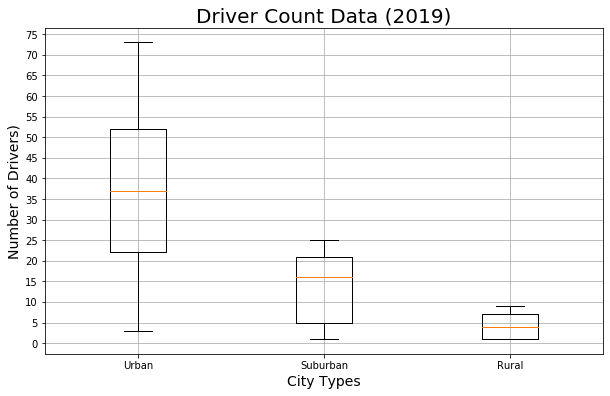

In [66]:
# Create the box-and-whisker plot for the rural driver count data.
x_labels = ["Urban", "Suburban", "Rural"]
driver_count_data = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(driver_count_data,labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)', fontsize=20)
ax.set_ylabel('Number of Drivers)', fontsize=14)
ax.set_xlabel('City Types', fontsize=14)
ax.set_yticks(np.arange(0, 80, step=5.0))
ax.grid()
# save the figure
plt.savefig("Analysis/Fig4.png")
plt.show()

In [67]:
# get the sum of the fares for each city type
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [68]:
# get the sum of all the fares
total_fares = pyber_data_df["fare"].sum()
total_fares

63538.64

In [69]:
# calculate the percentage of fare for each city type
fare_percents = 100 * pyber_data_df.groupby(["type"]).sum()["fare"] / pyber_data_df["fare"].sum()
fare_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

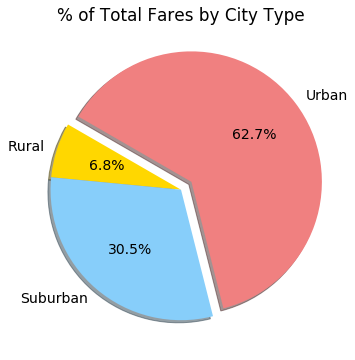

In [70]:
# build the percentage of fares by city type pie chart
plt.subplots(figsize=(10,6))

# change default font size from 10 to 14
mpl.rcParams['font.size'] = 14

plt.pie(fare_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")

# save figure
plt.savefig("Analysis/Fig5.png")

# show figure
plt.show()

In [71]:
# get the ride count for each city type
rides_by_type = pyber_data_df.groupby(["type"]).count()["ride_id"]
rides_by_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [72]:
# get the total ride count
total_rides = pyber_data_df["ride_id"].count()
total_rides

2375

In [73]:
# calculate the percentage of rides for each city type
ride_percents = 100 * pyber_data_df.groupby(["type"]).count()["ride_id"] / pyber_data_df["ride_id"].count()
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

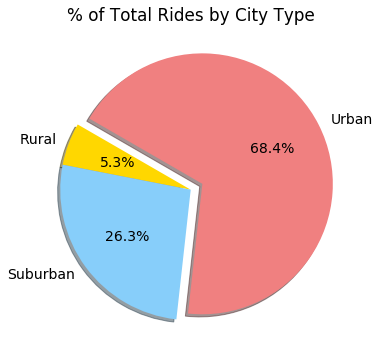

In [74]:
# build the percentage of rides by city type pie chart
plt.subplots(figsize=(10,6))

plt.pie(ride_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")

# change default font size from 10 to 14
mpl.rcParams['font.size'] = 14

# save figure
plt.savefig("Analysis/Fig6.png")

# show figure
plt.show()

In [75]:
# make pie chart of % of total drivers by city type

## confirm number of cities (no duplicates)
len(city_data_df["city"].unique())

120

In [76]:
## sum of drivers by city type
sum_drivers = city_data_df.groupby(["type"]).sum()["driver_count"]
sum_drivers

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [77]:
## total number of drivers
total_drivers = city_data_df["driver_count"].sum()
total_drivers

2973

In [78]:
## percentage of drivers by city type
driver_percents = 100*city_data_df.groupby(["type"]).sum()["driver_count"] / city_data_df["driver_count"].sum()
driver_percents

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

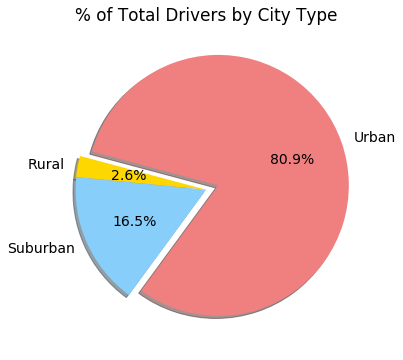

In [79]:
## pie chart: % of drivers by city type
plt.subplots(figsize=(10,6))

plt.pie(driver_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=165)
plt.title("% of Total Drivers by City Type")

# change default font size from 10 to 14
mpl.rcParams['font.size'] = 14

# save figure
plt.savefig("Analysis/Fig7.png")

# show figure
plt.show()

In [80]:
# Challenge

## total rides per city type
total_rides = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [81]:
## total drivers per city type
total_drivers = city_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [82]:
## total fares per city type
total_fares = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [83]:
## average fare per ride per city type
fare_per_ride = pyber_data_df.groupby(["type"]).mean()["fare"]
fare_per_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
Name: fare, dtype: float64

In [84]:
## average fare per driver per city type
fare_per_driver = pyber_data_df.groupby(["type"]).sum()["fare"] / city_data_df.groupby(["type"]).sum()["driver_count"]
fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [85]:
## create summary df
summary_df = pd.DataFrame({
    "Total Rides": total_rides,
    "Total Drivers": total_drivers,
    "Total Fares": total_fares,
    "Average Fare per Ride": fare_per_ride,
    "Average Fare per Driver": fare_per_driver})

## delete index name
summary_df.index.name = None

## formatting
summary_df["Total Rides"] = summary_df["Total Rides"].map("{:,}".format)
summary_df["Total Drivers"] = summary_df["Total Drivers"].map("{:,}".format)
summary_df["Total Fares"] = summary_df["Total Fares"].map("${:,.2f}".format)
summary_df["Average Fare per Ride"] = summary_df["Average Fare per Ride"].map("${:.2f}".format)
summary_df["Average Fare per Driver"] = summary_df["Average Fare per Driver"].map("${:.2f}".format)

summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


In [86]:
## rename columns in pyber_data_df
pyber_data_df.columns = pyber_data_df.columns.map({'city':'City', 
                                                   'date':'Date',
                                                   'fare':'Fare', 
                                                   'ride_id': 'Ride Id',
                                                   'driver_count': 'No. Drivers', 
                                                   'type':'City Type'})
pyber_data_df.head()

,City,Date,Fare,Ride Id,No. Drivers,City Type
0,Lake Jonathanshire,2019-01-14 10:14,13.83,5.740000e+12,5,Urban
1,South Michelleport,2019-03-04 18:24,30.24,2.340000e+12,72,Urban
2,Port Samanthamouth,2019-02-24 4:29,33.44,2.010000e+12,57,Urban
3,Rodneyfort,2019-02-10 23:22,23.44,5.150000e+12,34,Urban
4,South Jack,2019-03-06 4:28,34.58,3.910000e+12,46,Urban


In [87]:
## convert date to datetime dtype & confirm
pyber_data_df["Date"] = pyber_data_df["Date"].astype("datetime64[ns]")
pyber_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2375 entries, 0 to 2374
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   City         2375 non-null   object        
 1   Date         2375 non-null   datetime64[ns]
 2   Fare         2375 non-null   float64       
 3   Ride Id      2375 non-null   float64       
 4   No. Drivers  2375 non-null   int64         
 5   City Type    2375 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 129.9+ KB


In [88]:
## set index as Date
date_index_df = pyber_data_df.set_index(["Date"])
date_index_df.head()

,City,Fare,Ride Id,No. Drivers,City Type
Date,,,,,
2019-01-14 10:14:00,Lake Jonathanshire,13.83,5.740000e+12,5,Urban
2019-03-04 18:24:00,South Michelleport,30.24,2.340000e+12,72,Urban
2019-02-24 04:29:00,Port Samanthamouth,33.44,2.010000e+12,57,Urban
2019-02-10 23:22:00,Rodneyfort,23.44,5.150000e+12,34,Urban
2019-03-06 04:28:00,South Jack,34.58,3.910000e+12,46,Urban


In [89]:
## new df with date, city type, fare
fare_per_date_df = date_index_df[["City Type","Fare"]].copy()
fare_per_date_df.head()

,City Type,Fare
Date,,
2019-01-14 10:14:00,Urban,13.83
2019-03-04 18:24:00,Urban,30.24
2019-02-24 04:29:00,Urban,33.44
2019-02-10 23:22:00,Urban,23.44
2019-03-06 04:28:00,Urban,34.58


In [90]:
## confirm index Date is datetime dtype
fare_per_date_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-14 10:14:00 to 2019-04-25 10:20:00
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City Type  2375 non-null   object 
 1   Fare       2375 non-null   float64
dtypes: float64(1), object(1)
memory usage: 55.7+ KB


In [91]:
## sum of fares df grouped by city type & date
sum_by_date_df = pd.DataFrame(fare_per_date_df.groupby(["City Type","Date"]).sum()["Fare"])
sum_by_date_df

Fare
City Type Date                      
Rural     2019-01-01 09:45:00  43.69
          2019-01-02 11:18:00  52.12
          2019-01-03 19:51:00  19.90
          2019-01-04 03:31:00  24.88
          2019-01-06 07:38:00  47.33
...                              ...
Urban     2019-05-08 04:20:00  21.99
          2019-05-08 04:39:00  18.45
          2019-05-08 07:29:00  18.55
          2019-05-08 11:38:00  19.77
          2019-05-08 13:10:00  18.04

[2364 rows x 1 columns]

In [97]:
## reset the index
sum_fares_df = sum_by_date_df.reset_index()
sum_fares_df.head()

,City Type,Date,Fare
0,Rural,2019-01-01 09:45:00,43.69
1,Rural,2019-01-02 11:18:00,52.12
2,Rural,2019-01-03 19:51:00,19.90
3,Rural,2019-01-04 03:31:00,24.88
4,Rural,2019-01-06 07:38:00,47.33


In [93]:
# make pivot table df
pivot_table_df = sum_fares_df.pivot(index="Date", columns="City Type", values="Fare")
pivot_table_df.head(10)

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 02:07:00,NaN,24.07,NaN
2019-01-01 03:46:00,NaN,NaN,7.57
2019-01-01 05:23:00,NaN,NaN,10.75
2019-01-01 09:45:00,43.69,NaN,NaN
2019-01-01 12:32:00,NaN,25.56,NaN
2019-01-01 14:40:00,NaN,NaN,5.42
2019-01-01 14:42:00,NaN,NaN,12.31


In [98]:
# new df on dates '2019-01-01':'2019-04-28'
jan_april_df = pivot_table_df.loc['2019-01-01':'2019-04-28']
jan_april_df.head()

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 02:07:00,NaN,24.07,NaN
2019-01-01 03:46:00,NaN,NaN,7.57
2019-01-01 05:23:00,NaN,NaN,10.75


In [99]:
# resample into weekly bins with each week summed
plot_df = jan_april_df.resample("7D").sum()
plot_df.head()

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01,187.92,876.61,1879.70
2019-01-08,139.80,1080.40,2193.36
2019-01-15,233.85,1163.93,2105.90
2019-01-22,210.94,1285.13,1846.98
2019-01-29,361.50,1079.58,2085.77


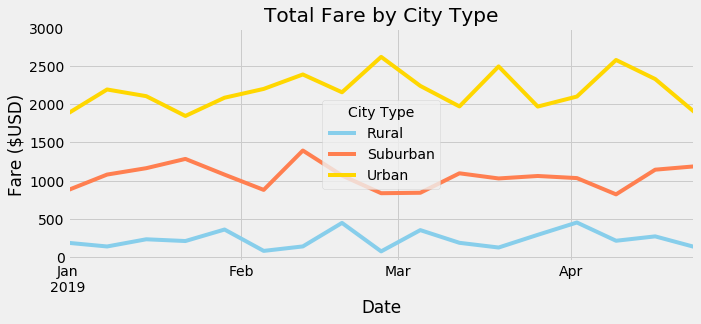

In [100]:
# plot df using fiveThirtyEight style
color_scheme = ["skyblue", "coral", "gold",]

plt.style.use('fivethirtyeight')

ax = plot_df.plot(figsize=(10,4), color=color_scheme)

ax.set_title("Total Fare by City Type")
ax.set_ylabel("Fare ($USD)")
ax.set_yticks(np.arange(0, 3500, step=500))

# # Save the figure
plt.savefig("Analysis/Fig8.png", bbox_inches="tight")

plt.show()